In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

In [2]:
import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()



'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [3]:
from benji_girgs import utils, generation, points, fitting, mcmc
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import numpy as np
import matplotlib.pyplot as plt

import do_feature_extract
import networkx as nx


/cluster/scratch/bdayan/GIRG_data/socfb-Duke14.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UChicago30.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-MIT.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-WashU32.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Stanford3.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-JohnsHopkins55.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Rice31.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-GWU54.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vermont70.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-UCSB37.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vanderbilt48.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-CMU.SpaceOne
/cluster/scrat

In [6]:
os.getcwd()

'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [43]:
import pickle

def trim_MC_lls(MC):
    lls_new = []
    ll_steps_new = []
    for i, (ll, ll_steps) in enumerate(zip(MC.lls, MC.ll_steps)):
        if i % 100 == 0:
            lls_new.append(ll)
            ll_steps_new.append(ll_steps)

    if i % 100 != 0:
        lls_new.append(ll)
        ll_steps_new.append(ll_steps)

    MC.lls = lls_new
    MC.ll_steps = ll_steps_new

pickle_path = '../../MCMC_run_fp_0p3_cl_0p5_v3/pickles/'
fns = os.listdir(pickle_path)
for name in fns:
    print(name)
    try:
        with open(pickle_path + name, 'rb') as file:
            MC = pickle.load(file)
    except:
        continue
    if not MC.g:
        continue
    MC.g = None
    MC.A = None
    MC.probs_cl = None
    trim_MC_lls(MC)
    # MC.probs_cl = None
    with open(pickle_path + name, 'wb') as file:
            pickle.dump(MC, file)

socfb-Caltech36-1d.pkl
socfb-Caltech36-2d.pkl
socfb-Simmons81-1d.pkl
socfb-Simmons81-2d.pkl
socfb-Bowdoin47-1d.pkl
socfb-Bowdoin47-2d.pkl
socfb-USFCA72-1d.pkl
socfb-USFCA72-2d.pkl
socfb-Smith60-1d.pkl
socfb-Smith60-2d.pkl
socfb-Vassar85-1d.pkl
socfb-Vassar85-2d.pkl
socfb-Santa74-1d.pkl
socfb-Santa74-2d.pkl
socfb-Bucknell39-1d.pkl
socfb-Bucknell39-2d.pkl
socfb-Rice31-1d.pkl
socfb-Rice31-2d.pkl
socfb-JohnsHopkins55-1d.pkl
socfb-JohnsHopkins55-2d.pkl
socfb-MIT-1d.pkl


In [38]:
MC.ll_steps

[0,
 1,
 3,
 4,
 6,
 9,
 12,
 13,
 16,
 17,
 18,
 19,
 23,
 24,
 26,
 28,
 30,
 31,
 32,
 33,
 36,
 42,
 44,
 47,
 51,
 54,
 55,
 60,
 62,
 63,
 64,
 65,
 66,
 68,
 70,
 74,
 75,
 76,
 77,
 78,
 81,
 82,
 85,
 89,
 91,
 94,
 95,
 99,
 103,
 105,
 108,
 114,
 116,
 128,
 129,
 130,
 131,
 133,
 134,
 136,
 138,
 140,
 143,
 146,
 148,
 150,
 151,
 153,
 155,
 156,
 160,
 162,
 164,
 166,
 167,
 171,
 172,
 181,
 182,
 184,
 185,
 186,
 187,
 189,
 190,
 191,
 192,
 196,
 198,
 201,
 202,
 203,
 206,
 210,
 212,
 222,
 223,
 224,
 227,
 229,
 230,
 233,
 234,
 237,
 239,
 240,
 242,
 244,
 245,
 246,
 250,
 251,
 252,
 253,
 254,
 256,
 258,
 260,
 261,
 262,
 263,
 267,
 270,
 272,
 273,
 274,
 276,
 277,
 281,
 283,
 285,
 287,
 288,
 289,
 290,
 292,
 295,
 297,
 305,
 306,
 307,
 313,
 314,
 317,
 319,
 322,
 324,
 325,
 328,
 336,
 344,
 347,
 350,
 351,
 352,
 355,
 358,
 359,
 360,
 364,
 366,
 367,
 368,
 371,
 372,
 374,
 375,
 378,
 380,
 382,
 383,
 384,
 390,
 391,
 392,
 396

In [21]:
MC.graph_name

'socfb-Smith60-1d'

In [24]:
sys.getsizeof(MC)

48

In [26]:
len(MC.outs)

96

In [27]:
MC.shared_pts

<SynchronizedArray wrapper for <multiprocessing.sharedctypes.c_double_Array_2970 object at 0x2ad2290ea440>>

In [31]:
import sys

def get_deep_size(obj, seen=None):
    """Find the memory footprint of an object including the objects it refers to."""
    size = sys.getsizeof(obj)
    if seen is None:
        seen = set()
    obj_id = id(obj)
    if obj_id in seen:
        return 0
    # Mark as seen
    seen.add(obj_id)
    if isinstance(obj, dict):
        size += sum([get_deep_size(v, seen) for v in obj.values()])
        size += sum([get_deep_size(k, seen) for k in obj.keys()])
    elif hasattr(obj, '__dict__'):
        size += get_deep_size(obj.__dict__, seen)
    elif hasattr(obj, '__iter__') and not isinstance(obj, (str, bytes, bytearray)):
        size += sum([get_deep_size(i, seen) for i in obj])
    return size


def get_attribute_sizes(obj):
    attributes = vars(obj)
    attribute_sizes = {}
    for attr_name, attr_value in attributes.items():
        attribute_sizes[attr_name] = get_deep_size(attr_value)
    return attribute_sizes
import pprint
pprint.pprint(get_attribute_sizes(MC))

{'A': 16,
 'alpha': 24,
 'cl_mixin_prob': 24,
 'const': 32,
 'const_in': 32,
 'd': 28,
 'expected_num_edges': 32,
 'failure_prob': 24,
 'g': 16,
 'graph_name': 65,
 'll': 32,
 'll_steps': 12416,
 'lls': 13752,
 'n': 28,
 'num_acceptances': 28,
 'num_steps': 28,
 'out_cl': 512,
 'outs': 24740,
 'percent_edges_captured_cl': 32,
 'percent_edges_captureds': 12100,
 'percent_fake_edges_wrong_cl': 32,
 'pool': 28,
 'probs_cl': 190432,
 'pts': 256,
 'pts_init': 256,
 'pts_type': 1382,
 'shared_pts': 1915,
 'shared_pts_init': 1919,
 'weights': 95152,
 'weights_original': 95152}


In [29]:
MC.g

In [ ]:

def trim_MC_lls(MC):
    lls_new = []
    ll_steps_new = []
    for i, (ll, ll_steps) in enumerate(zip(MC.lls, MC.ll_steps)):
        if i % 100 == 0:
            lls_new.append(ll)
            ll_steps_new.append(ll_steps)

    if i % 100 != 0:
        lls_new.append(ll)
        ll_steps_new.append(ll_steps)

    MC.lls = lls_new
    MC.ll_steps = ll_steps_new

trim_MC_lls(MC)

In [16]:
len(MC.lls)
len(MC.ll_steps)

In [4]:
import os
os.getcwd()
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

In [5]:
df.sort_values('Graph').loc[:, ['Graph', 'Model', 'Nodes', 'Info']]

,Graph,Model,Nodes,Info
89,socfb-American75,2d-copyweight-cube-girg,6338,"{'tau': 4.849201442177161, 'alpha': 1.05925190..."
79,socfb-American75,1d-copyweight-cube-girg,6356,"{'tau': 4.849201442177161, 'alpha': 1.07671601..."
101,socfb-American75,3d-copyweight-cube-girg,6341,"{'tau': 4.849201442177161, 'alpha': 1.05073058..."
21,socfb-Amherst41,2d-copyweight-cube-girg,2231,"{'tau': 5.642546890477902, 'alpha': 1.08566581..."
10,socfb-Amherst41,1d-copyweight-cube-girg,2228,"{'tau': 5.642546890477902, 'alpha': 1.11343075..."
...,...,...,...,...
15,socfb-Williams40,1d-copyweight-cube-girg,2785,"{'tau': 5.1655263550168184, 'alpha': 1.1181969..."
28,socfb-Williams40,2d-copyweight-cube-girg,2777,"{'tau': 5.1655263550168184, 'alpha': 1.0947656..."
140,socfb-Yale4,2d-copyweight-cube-girg,8506,"{'tau': 5.790413433544749, 'alpha': 1.04234527..."
151,socfb-Yale4,3d-copyweight-cube-girg,8519,"{'tau': 5.790413433544749, 'alpha': 1.02195608..."


In [6]:
df.iloc[21][['Graph', 'Model', 'Nodes', 'Info']]
df.iloc[21].Info
alpha, const = df.iloc[21].Info['alpha'], df.iloc[21].Info['const']
print(alpha, const)

1.0856658184902461 0.07032075311965111


In [7]:
gd = list(filter(lambda x: x['Name'] == 'socfb-Amherst41', do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

Network Properties:
nodes, edges			2235, 90954
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.036433
clustering coefficient		0.310386
min/max/avg degree		1, 467, 81.390604
degree assortativity		0.058704
number of connected components	1
size of largest component	2235 (100.00 %)


In [1]:
import pickle

pickle_path = '../../MCMC_run_failure_probs_0p3/pickles/'
fns =
with open(pickle_path + name + '-1d' + '.pkl', 'rb') as file:
    MC = pickle.load(file)

NameError: name 'name' is not defined

In [18]:
foos = os.listdir(pickle_path)

In [24]:
foos[0][:-foos[0][::-1].index('-')-1]

'socfb-USFCA72'

In [28]:
fn =foos[0]
fn[:-fn[::-1].index('-')-1]
fn[-fn[::-1].index('-')]

'1'

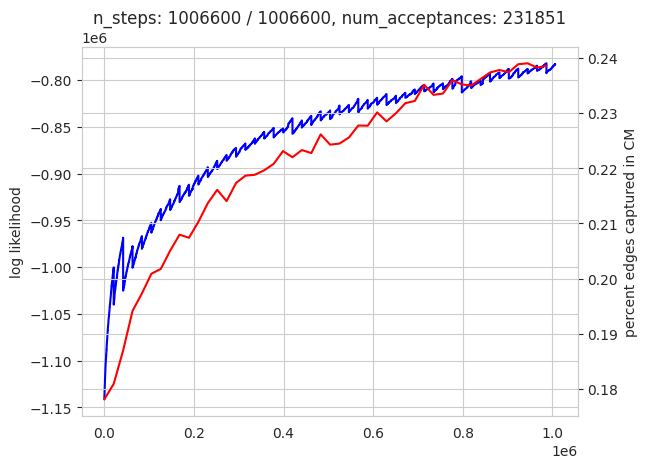

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

MC.plot_ll(MC.num_steps, CM=True)

In [15]:
%matplotlib notebook

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()


<IPython.core.display.Javascript object>

In [16]:
MC.run_pool(10000, pool_size=15, jobs_per_worker=25, plot_every=3000)

  0%|          | 0/10000 [00:00<?, ?it/s]../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered in true_divide
  p_uv = np.divide(wuwv, dists**d)
../benji_girgs/generation.py:78: RuntimeWarning: divide by zero encountered i

In [ ]:
# n = 1500
# d=2
# tau=2.1
# alpha=1.2
# desiredAvgDegree=100.0
#
# g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree,
#                                                                 points_type=points.PointsCube)
#
# g = utils.get_largest_component(g)
# nk.overview(g)
# n = g.numberOfNodes()

In [ ]:
import importlib
importlib.reload(mcmc)
from tests import test_mcmc

In [ ]:
g, A, weights, const, pts, MC = mcmc.g_initialised_mcmc(g, alpha=alpha, const=const, pts_d=2, diffmap_init=True, graph_name='socfb-Amherst41')

In [ ]:
g_dm, A_dm = MC.MC_to_g_A()
np.set_printoptions(formatter={'int_kind': '{:,}'.format})

nk.overview(g_dm)


In [ ]:
nk.overview(g)

In [ ]:
g_dm, A_dm = MC.MC_to_g_A()

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)
print()


In [ ]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [ ]:
MC.ll

In [ ]:
%matplotlib notebook
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
plt.ion()
fig.show()
fig.canvas.draw()

In [ ]:
MC.run_pool(100000, pool_size=15, jobs_per_worker=25, plot_every=15000)

In [ ]:
%matplotlib inline
MC.acceptances_plot(convolve_width=10000)

In [ ]:
os.environ['DATA_PATH'] = '../../MCMC_testing/'

In [ ]:
os.environ['DATA_PATH']

In [ ]:
os.getcwd()

In [ ]:
%matplotlib inline
# a = MC.pts[:, 0]
# plt.hist(a[a<0.04], bins=50)

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.figure()
plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=30)

In [ ]:
MC.expected_num_edges

In [ ]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)

out, percent_edges_captured, percent_fake_edges_wrong = mcmc.CM(A, A_dm)
print(out)
print(percent_edges_captured)
print(percent_fake_edges_wrong)


In [ ]:
nk.overview(g_dm)
nk.overview(g)
nk.overview(g_init)

In [ ]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
# g_init, A_init = test_mcmc.MC_to_g_A(MC_init)

nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

In [ ]:
MC.plot_ll(MC.num_steps)

In [ ]:
MC.calculate_ll()

In [ ]:
MC.ll_steps

In [ ]:
import pickle
with open('temp.pkl', 'wb') as file:
    pickle.dump(MC, file)

In [ ]:
import multiprocessing
import ctypes

def gs(self):
    state = self.__dict__.copy()
    del state['shared_pts']
    del state['shared_pts_init']

def ss(self, state):
    self.__dict__.update(state)
    if self.pool:
        self.shared_pts = multiprocessing.Array(ctypes.c_double, self.pts.flatten())
        self.pts = self.pts_type(np.frombuffer(self.shared_pts.get_obj()).reshape(self.pts.shape))
        self.shared_pts_init = multiprocessing.Array(ctypes.c_double, self.pts_init.flatten())
        self.pts_init = self.pts_type(np.frombuffer(self.shared_pts_init.get_obj()).reshape(self.pts_init.shape))

MC.__getstate__ = gs
MC.__setstate__ = ss

In [ ]:
MC.calculate_ll()

In [ ]:
MC.calculate_ll()

In [ ]:
def mcmc_girg_init_worker(pts, pts_shape, pts_init, weights, g):
    mp_var_dict = mcmc.mp_var_dict
    mp_var_dict['pts'] = pts
    mp_var_dict['pts_shape'] = pts_shape
    # mp_var_dict['pts_init'] = None
    if 'pts_init' in mp_var_dict:
        del(mp_var_dict['pts_init'])
    mp_var_dict['weights'] = weights
    mp_var_dict['g'] = g

mcmc.mcmc_girg_init_worker = mcmc_girg_init_worker

In [ ]:
foo = {'a': 1}
del(foo['b'])

In [ ]:

u_index = 100
sigma, p_normal=None, None
if sigma is None:
    sigma = 2 * ((1/n)**1/d)
if p_normal is None:
    p_normal = 0.7

x_u_init = MC.pts_init[u_index]
x_u2 = mcmc.MCMC_girg.proposal(1, d, sigma=sigma, x_u=x_u_init, p_normal=p_normal).squeeze()

def prior_x_u(pt):
    out = p_normal * np.sqrt(1/(2*np.pi) * np.exp(-np.linalg.norm(pt - x_u_init)**2 / (2 * sigma**(2*d))))
    + (1 - p_normal)
    return out
acceptance_prob, u_ll_old, u_ll_new, p_u_to_vs_old, p_u_to_vs_new = mcmc.MCMC_girg.acceptance_prob_static(MC.g, weights, alpha, MC.const_in, MC.pts,
                                                                                    u_index, x_u2, prior_x_u)

In [ ]:
x_u2
x_u_init

In [ ]:
prior_x_u(x_u_init)
prior_x_u(x_u2)

In [ ]:
pts = MC.pts
eps = 1e-7
p_u_to_vs = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
p_u_to_vs = np.clip(p_u_to_vs, eps, 1 - eps)

x_u = pts[u_index].copy()
pts[u_index] = x_u2
p_u_to_vs2 = generation.get_probs_u(weights, MC.pts, alpha, MC.const_in, u_index)
pts[u_index] = x_u
p_u_to_vs2 = np.clip(p_u_to_vs2, eps, 1 - eps)

u_ll_old = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs)
u_ll_new = mcmc.MCMC_girg.p_u_to_vs_to_ll(g, u_index, p_u_to_vs2)

In [ ]:
u_ll_old
u_ll_new

In [ ]:
%matplotlib inline
MC.acceptances_plot(convolve_width=30)

In [ ]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'

In [ ]:
%matplotlib inline
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.05, 0.12])
plt.ylim([0.8, 1.0])
plt.figure()

plt.scatter(MC.pts[:, 0], MC.pts[:, 1])
plt.xlim([0.06, 0.08])
plt.ylim([0.875, 1.0])
plt.figure()

# plt.hist2d(MC.pts[:, 0], MC.pts[:, 1], bins=1000)
# plt.xlim([0.06, 0.09])
# plt.ylim([0.0, 0.2])

In [ ]:
%matplotlib inline
plt.hist(MC.pts[:, 0])
plt.figure()
plt.hist(MC.pts[:, 1])


In [ ]:
plt.scatter(MC.pts[:, 0], MC.pts[:, 1])

In [ ]:
g_mc, A_mc = test_mcmc.MC_to_g_A(MC)
nk.overview(g_mc)

In [ ]:
CM = test_mcmc.quick_acc(A, A_mc)
CM
test_mcmc.quick_summarise_CM(CM)

CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)

':('

In [ ]:
a = df.loc[:, ['Graph', 'Model', 'Nodes', 'Info']]
a

In [ ]:
a.loc[a.Graph == 'socfb-Pepperdine86']

In [ ]:
df.iloc[41].Info

In [ ]:
df.iloc[53].Info

In [ ]:
import importlib
importlib.reload(test_mcmc)

In [ ]:
# gd = do_feature_extract.graph_dicts[21]

gd = list(filter(lambda x: x['Name'] == 'socfb-Pepperdine86', do_feature_extract.graph_dicts))[0]

in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)
n = g.numberOfNodes()

alpha = df.iloc[53].Info['alpha']
const = df.iloc[53].Info['const']

In [ ]:
g, A, weights, const, pts_diffmap, pts_init, MC, MC_init = test_mcmc.test_diffmap_on_g(g, alpha=alpha, const=const, pts_d=2)

In [ ]:
g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
nk.overview(g_dm)
nk.overview(g_init)

CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)
':)'


In [ ]:
MC.run_pool(20000, pool_size=15, jobs_per_worker=15, plot_every=20)

In [ ]:
from tests import test_mcmc
from tests.test_mcmc import *
import importlib
importlib.reload(test_mcmc)
g, A, weights, const, pts, pts_diffmap, pts_init, MC, MC_init, MC_cheat = test_mcmc.test_diffmap()

g_dm, A_dm = test_mcmc.MC_to_g_A(MC)
g_init, A_init = test_mcmc.MC_to_g_A(MC_init)
g_cheat, A_cheat = test_mcmc.MC_to_g_A(MC_cheat)


In [ ]:
(const*2)**alpha

In [ ]:
g_temp, _, _, _, _ = generation.generate_GIRG_nk(n, d, tau, alpha, weights=weights, pts=pts, const=const)

In [ ]:
const

In [ ]:
pts

In [ ]:
nk.overview(g)
nk.overview(g_temp)

In [ ]:
nk.overview(g_cheat)

In [ ]:
nk.overview(g_dm)

In [ ]:
CM = test_mcmc.quick_acc(A, A_cheat)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_dm)
CM
test_mcmc.quick_summarise_CM(CM)
print('============')
CM = test_mcmc.quick_acc(A, A_init)
CM
test_mcmc.quick_summarise_CM(CM)


In [ ]:
np.where(A[0, :])

In [ ]:
list(g.iterNeighbors(0))

In [ ]:
list(g_temp.iterNeighbors(0))

In [ ]:
len(list(g_temp.iterNeighbors(0)))
len(list(g.iterNeighbors(0)))

In [ ]:
plt.scatter(pts[:, 0], pts_diffmap[:, 0])

In [ ]:
plt.scatter(pts[:, 0], pts_init[:, 0])